# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# import dataset
data = pd.read_csv("used_device_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking shape of data
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")

The data has 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(15, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


<IPython.core.display.Javascript object>

In [5]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# check the data types of the columns and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

In [7]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
# checking for missing values in the data.
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454,NaN,NaN,NaN,13.7131,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275,NaN,NaN,NaN,9.46021,4.81546,0.08,5,8,13,48
selfie_camera_mp,3452,NaN,NaN,NaN,6.55423,6.97037,0,2,5,8,32
int_memory,3450,NaN,NaN,NaN,54.5731,84.9724,0.01,16,32,64,1024
ram,3450,NaN,NaN,NaN,4.03612,1.3651,0.02,4,4,4,12
battery,3448,NaN,NaN,NaN,3133.4,1299.68,500,2100,3000,4000,9720


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the price of a used device?

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**`used_price`**

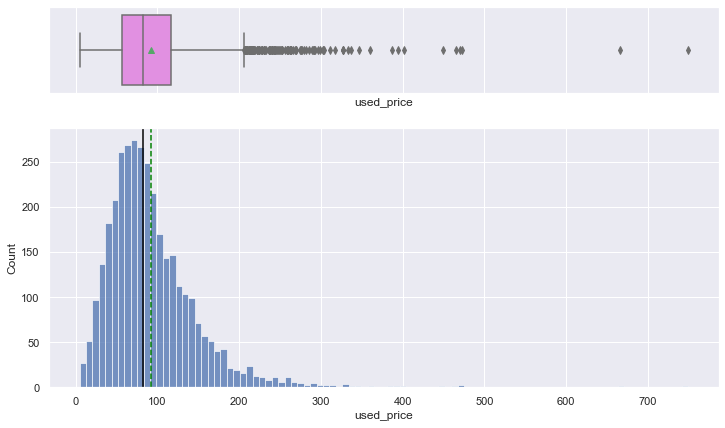

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(df, "used_price")

**`weight`**

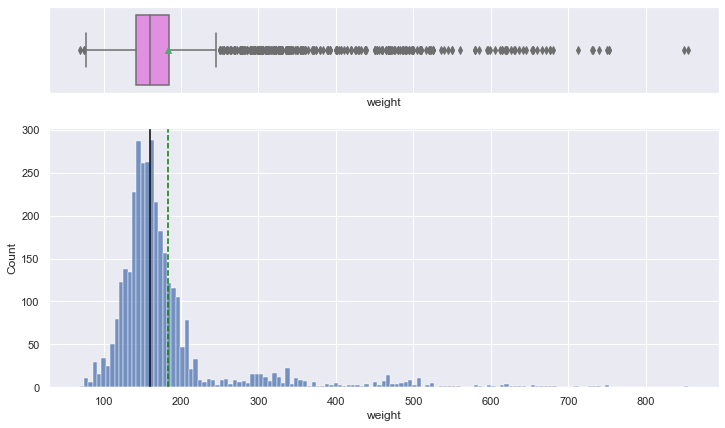

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "weight")

**`new_price`**

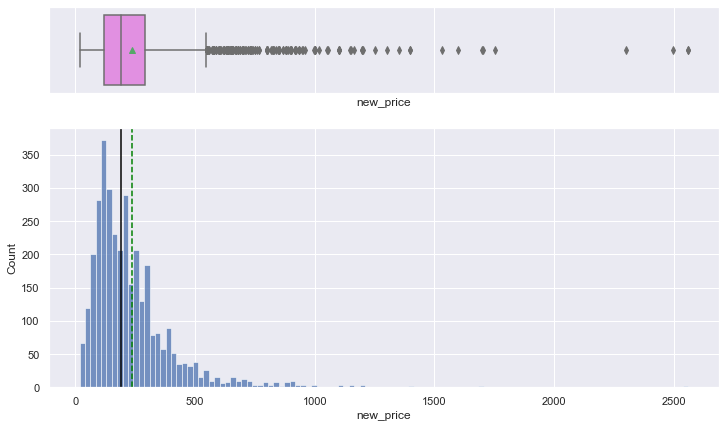

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(df, "new_price")

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

**`os`**

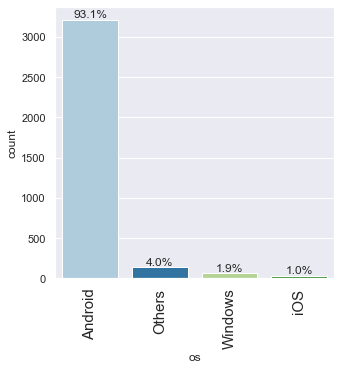

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(df, "os", perc=True)

**`brand_name`**

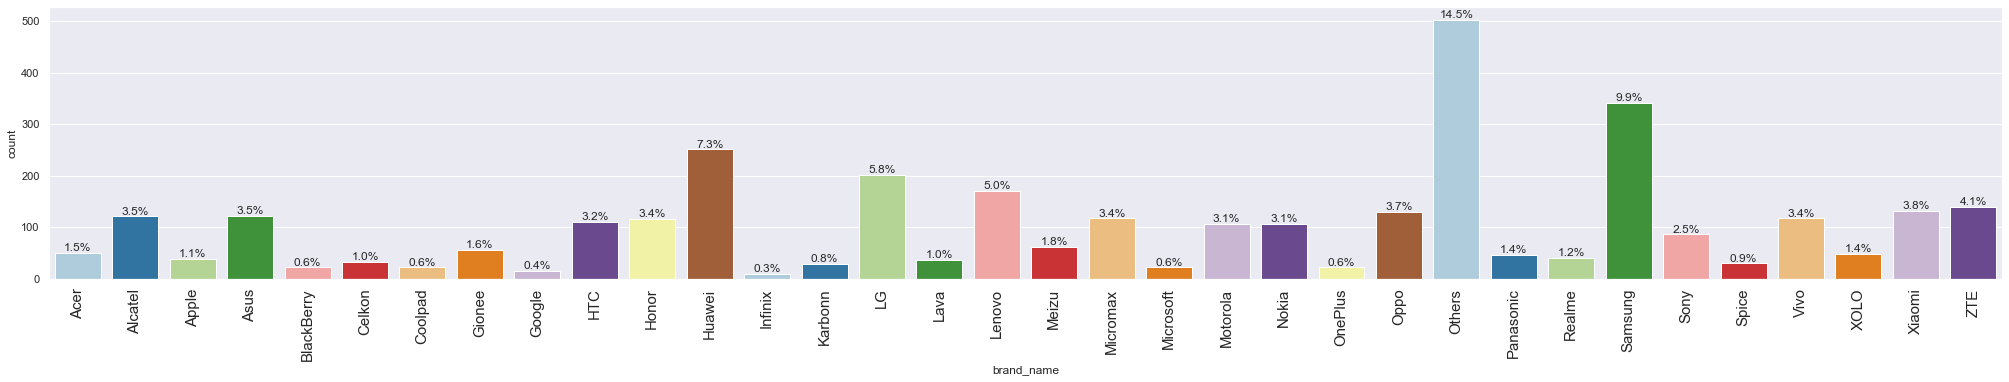

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(df, "brand_name", perc=True)

**`5g`**

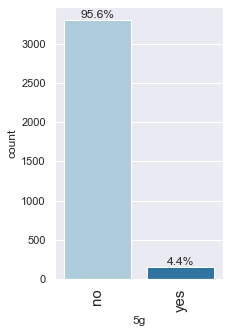

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(df, "5g", perc=True)

**`4g`**

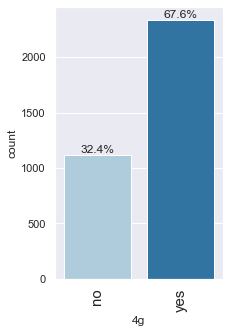

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(df, "4g", perc=True)

**`release_year`**

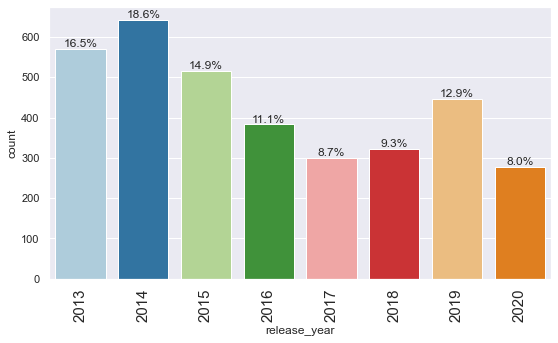

<IPython.core.display.Javascript object>

In [19]:
labeled_barplot(df, "release_year", perc=True)

### Bivariate Analysis

**The amount of RAM is important for the smooth functioning of a device. Here is how the amount of RAM vary with the brand**

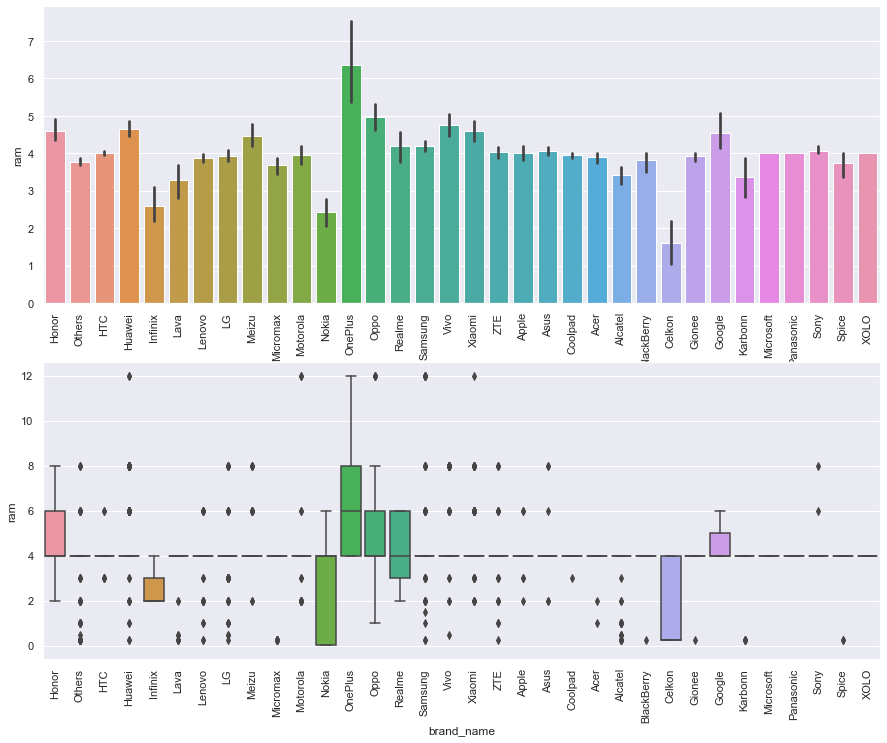

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)
### Bivariate Analysis
plt.subplot(2, 1, 2)
sns.boxplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

**A large battery often increases a device's weight, making it feel uncomfortable in the hands. Here is how  the weight vary among brand names**

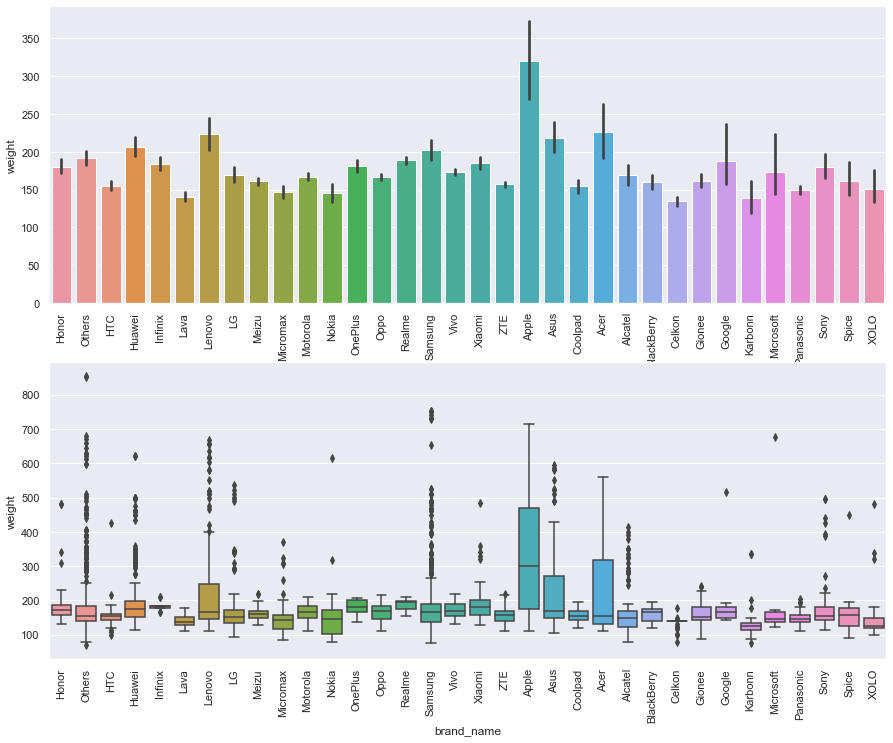

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=df, y="weight", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(data=df, y="weight", x="brand_name")
plt.xticks(rotation=90)

plt.show()

**Here is how the weight vary for phones and tablets offering large batteries (more than 4500 mAh)**

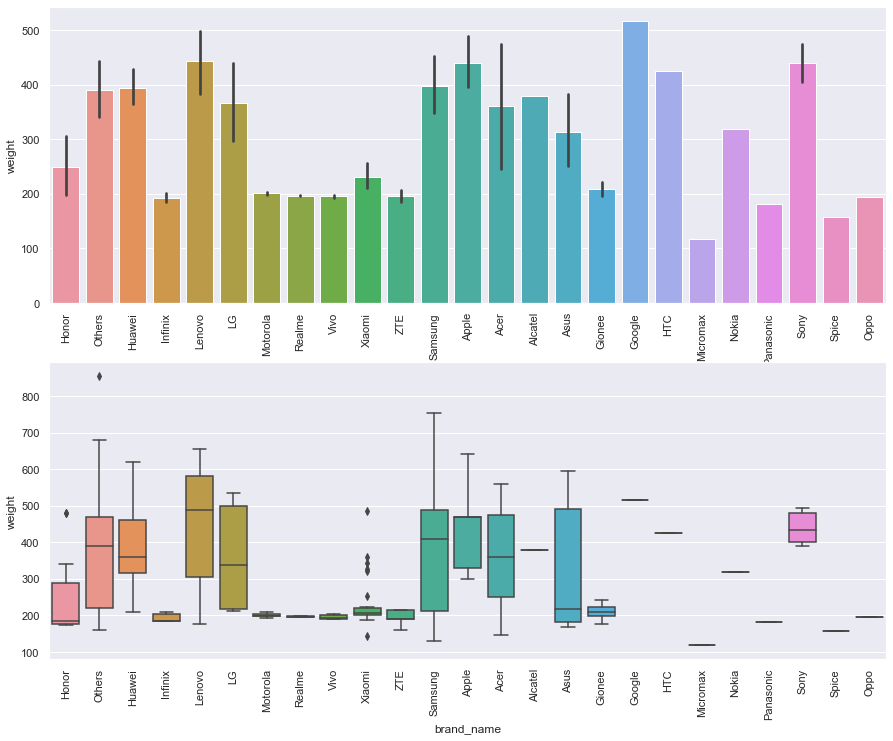

<IPython.core.display.Javascript object>

In [22]:
df_large_battery = df[df.battery > 4500]

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.barplot(data=df_large_battery, y="weight", x="brand_name")
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(data=df_large_battery, y="weight", x="brand_name")
plt.xticks(rotation=90)

plt.show()

**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches**

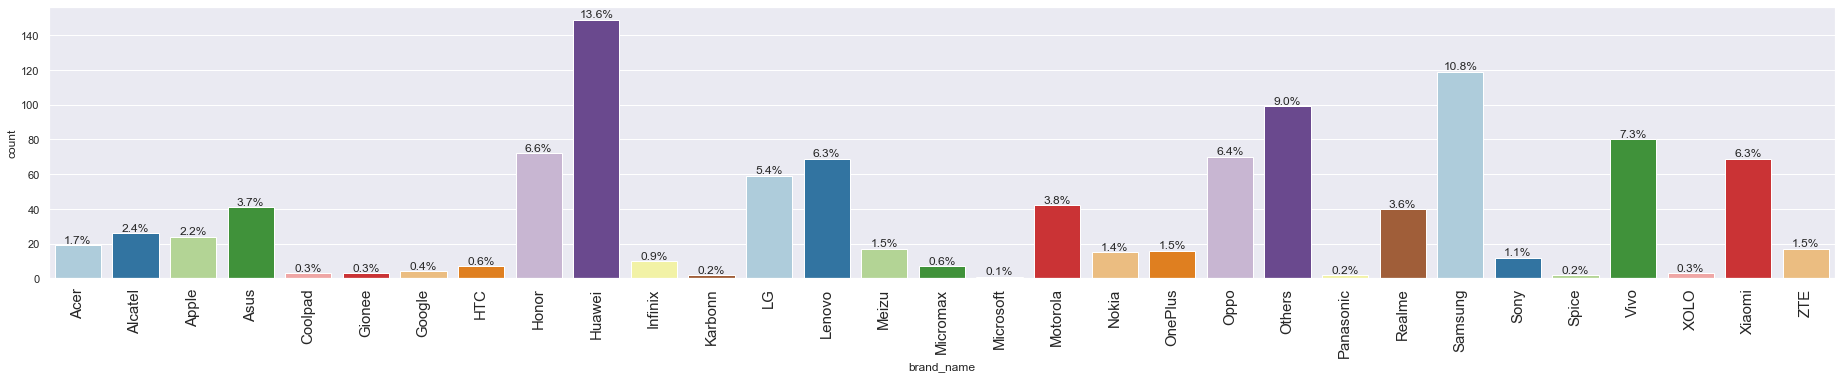

<IPython.core.display.Javascript object>

In [23]:
df_large_screen = df[(df.screen_size > 6 * 2.54)]
df_large_screen

labeled_barplot(df_large_screen, "brand_name", perc = True)



In [24]:
print(
    "The total number of phones and tablets with screen size greater than 6 inches is",
    df_large_screen["brand_name"].value_counts().sum(),
)

df4 = df_large_screen["brand_name"].value_counts().reset_index()

df4.columns = ["Brand Name", "Counts"]
df4

The total number of phones and tablets with screen size greater than 6 inches is 1099


,Brand Name,Counts
0,Huawei,149
1,Samsung,119
2,Others,99
3,Vivo,80
4,Honor,72
5,Oppo,70
6,Lenovo,69
7,Xiaomi,69
8,LG,59
9,Motorola,42


<IPython.core.display.Javascript object>

**Correlation**

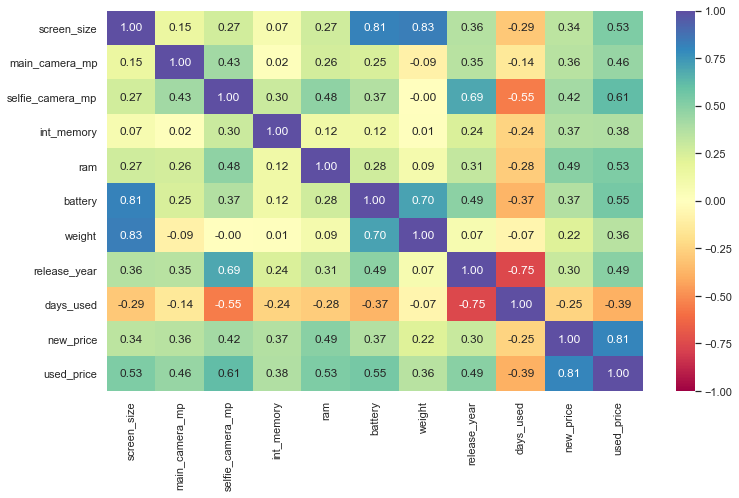

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Feature Engineering

- Let's create a new column `device_category` from the `new_price` column to tag devices as budget, mid-ranger, or premium.

In [26]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

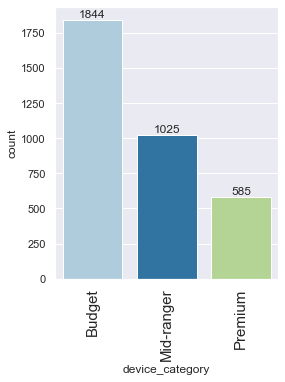

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "device_category")

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [28]:
## create a dataframe having selfie_camera_mp > 8

df_selfie_camera = df[(df["selfie_camera_mp"] > 8)]
df_selfie_camera.shape

(655, 16)

<IPython.core.display.Javascript object>

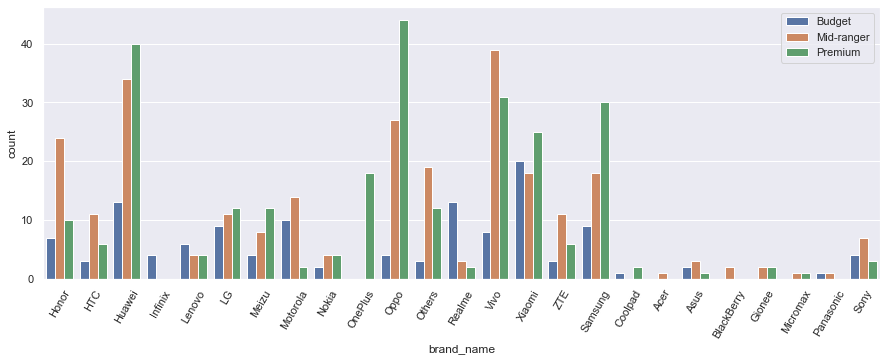

<IPython.core.display.Javascript object>

In [29]:
##   countplot for 'brandname' with hue = 'device_category' on df_selfie_camera

plt.figure(figsize=(15, 5))
sns.countplot(data=df_selfie_camera, x="brand_name", hue="device_category")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

**Similar analysis for rear cameras.**

In [30]:
## create a dataframe having main_camera_mp > 16

df_main_camera = df[(df["main_camera_mp"] > 16)]
df_main_camera.shape

(94, 16)

<IPython.core.display.Javascript object>

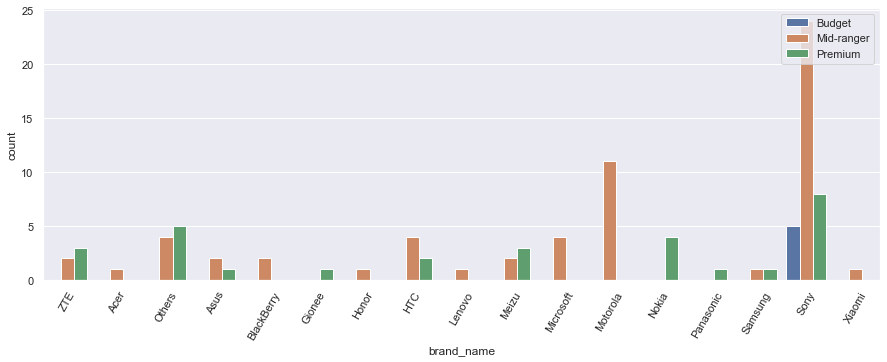

<IPython.core.display.Javascript object>

In [31]:
##   countplot for 'brandname' with hue = 'device_category' on df_main_camera

plt.figure(figsize=(15, 5))
sns.countplot(data=df_main_camera, x="brand_name", hue="device_category")
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

**Variation of the price of used devices across the years.**

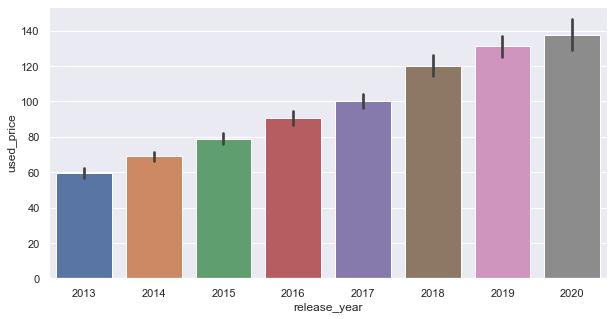

<IPython.core.display.Javascript object>

In [32]:
## barplot for release year and used price

plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="release_year", y="used_price")
plt.show()

**The distribution of 4G and 5G devices wrt price segments.**

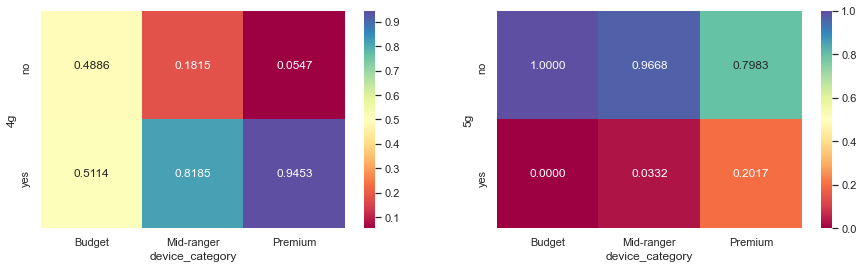

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [34]:
# checking for missing values in the data.
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df1 = df.copy()

df1[
    ["main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight"]
] = df1.groupby(["brand_name", "release_year"])[
    ["main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight"]
].transform(
    lambda x: x.fillna(x.median())
)

df1.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            0
ram                   0
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

* No imputation was done for `main_camera_mp` check to see there is no data for years where value is missing

In [36]:
df1[(df1.main_camera_mp.notnull())].groupby(["brand_name", "release_year"]).count()

os  screen_size   4g   5g  main_camera_mp  \
brand_name release_year                                               
Acer       2013           11           11   11   11              11   
           2014           19           19   19   19              19   
           2015           14           14   14   14              14   
           2016            6            6    6    6               6   
           2018            1            1    1    1               1   
Alcatel    2013           30           30   30   30              30   
           2014           34           34   34   34              34   
           2015           17           17   17   17              17   
           2016           15           15   15   15              15   
           2017            8            8    8    8               8   
           2018            9            9    9    9               9   
           2019            5            5    5    5               5   
           2020            3            3    3    3               3   
Apple      2013            4            4    4    4               4   
           2014            4            4    4    4               4   
           2015            5            5    5    5               5   
           2016            4            4    4    4               4   
           2017            6            6    6    6               6   
           2018            7            7    7    7               7   
           2019            6            6    6    6               6   
           2020            3            3    3    3               3   
Asus       2013           14           14   14   14              14   
           2014           29           29   29   29              29   
           2015           26           26   26   26              26   
           2016           20           20   20   20              20   
           2017           19           19   19   19              19   
           2018           10           10   10   10              10   
BlackBerry 2013            6            6    6    6               6   
           2014            4            4    4    4               4   
           2015            3            3    3    3               3   
           2016            2            2    2    2               2   
           2017            3            3    3    3               3   
Celkon     2013           24           24   24   24              24   
           2014            9            9    9    9               9   
Coolpad    2015            4            4    4    4               4   
           2016           12           12   12   12              12   
           2017            3            3    3    3               3   
Gionee     2013           16           16   16   16              16   
           2014            6            6    6    6               6   
           2015           12           12   12   12              12   
           2016           11           11   11   11              11   
           2017           10           10   10   10              10   
           2018            1            1    1    1               1   
Google     2015            1            1    1    1               1   
           2016            2            2    2    2               2   
           2017            2            2    2    2               2   
           2018            2            2    2    2               2   
           2019            8            8    8    8               8   
HTC        2013           18           18   18   18              18   
           2014           31           31   31   31              31   
           2015           23           23   23   23              23   
           2016           16           16   16   16              16   
           2017            6            6    6    6               6   
           2018            6            6    6    6               6   
           2019           10           10   10   1

<IPython.core.display.Javascript object>

In [37]:
df1[(df1.main_camera_mp.isnull())].groupby(["brand_name", "release_year"]).count()

os  screen_size  4g  5g  main_camera_mp  \
brand_name release_year                                            
Asus       2019           4            4   4   4               0   
BlackBerry 2018           4            4   4   4               0   
Coolpad    2018           1            1   1   1               0   
           2019           1            1   1   1               0   
           2020           1            1   1   1               0   
Infinix    2019           4            4   4   4               0   
           2020           6            6   6   6               0   
Lava       2020           2            2   2   2               0   
Meizu      2019          11           11  11  11               0   
           2020           4            4   4   4               0   
Motorola   2020          18           18  18  18               0   
OnePlus    2017           2            2   2   2               0   
           2018           3            3   3   3               0   
           2019           8            8   8   8               0   
           2020           4            4   4   4               0   
Oppo       2020          20           20  20  20               0   
Panasonic  2018           2            2   2   2               0   
Realme     2019          12           12  12  12               0   
           2020          24           24  24  24               0   
Sony       2019           5            5   5   5               0   
           2020           2            2   2   2               0   
Vivo       2020          14           14  14  14               0   
Xiaomi     2020          23           23  23  23               0   
ZTE        2020           4            4   4   4               0   

                         selfie_camera_mp  int_memory  ram  battery  weight  \
brand_name release_year                                                       
Asus       2019                         4           4    4        4       4   
BlackBerry 2018                         4           4    4        4       4   
Coolpad    2018                         1           1    1        1       1   
           2019                         1           1    1        1       1   
           2020                         1           1    1        1       1   
Infinix    2019                         4           4    4        4       4   
           2020                         6           6    6        6       6   
Lava       2020                         2           2    2        2       2   
Meizu      2019                        11          11   11       11      11   
           2020                         4           4    4        4       4   
Motorola   2020                        18          18   18       18      18   
OnePlus    2017                         2           2    2        2       2   
           2018                         3           3    3        3       3   
           2019                         8           8    8        8       8   
           2020                         4           4    4        4       4   
Oppo       2020                        20          20   20       20      20   
Panasonic  2018                         2           2    2        2       2   
Realme     2019                        12          12   12       12      12   
           2020                        24          24   24       24      24   
Sony       2019                         5           5    5        5       5   
           2020                         2           2    2        2       2   
Vivo       2020                        14          14   14       14      14   
Xiaomi     2020                        23          23   23       23      23   
ZTE        2020                         4           4    4        4       4   

                         days_used  new_price  used_price  device_category  
brand_name release_year                                                     
Asus       2019                  4          4  

<IPython.core.display.Javascript object>


- We will impute the missing values in the data by the column medians grouped by  `brand_name`.

In [38]:
df1[["main_camera_mp", "selfie_camera_mp", "battery", "weight"]] = df1.groupby(
    ["brand_name"]
)[["main_camera_mp", "selfie_camera_mp", "battery", "weight"]].transform(
    lambda x: x.fillna(x.median())
)

df1.isnull().sum()

brand_name           0
os                   0
screen_size          0
4g                   0
5g                   0
main_camera_mp      10
selfie_camera_mp     0
int_memory           0
ram                  0
battery              0
weight               0
release_year         0
days_used            0
new_price            0
used_price           0
device_category      0
dtype: int64

<IPython.core.display.Javascript object>

 - No imputation was done for 10 values. check to see there are no brand names with values that are missng

In [39]:
df1[df1.main_camera_mp.isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,device_category
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,99.25,72.39,Budget
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,111.25,78.54,Budget
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,90.51,65.46,Budget
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,99.70,95.13,Budget
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,130.49,82.82,Budget
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,100.02,81.87,Budget
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,110.18,89.65,Budget
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,88.88,79.10,Budget
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,100.08,82.93,Budget
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,129.81,83.37,Budget


<IPython.core.display.Javascript object>

- Impute with median values of data 

In [40]:
df1["main_camera_mp"].fillna(df1.main_camera_mp.median(), inplace=True)

df1.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
device_category     0
dtype: int64

<IPython.core.display.Javascript object>

## Variable Trasnformation

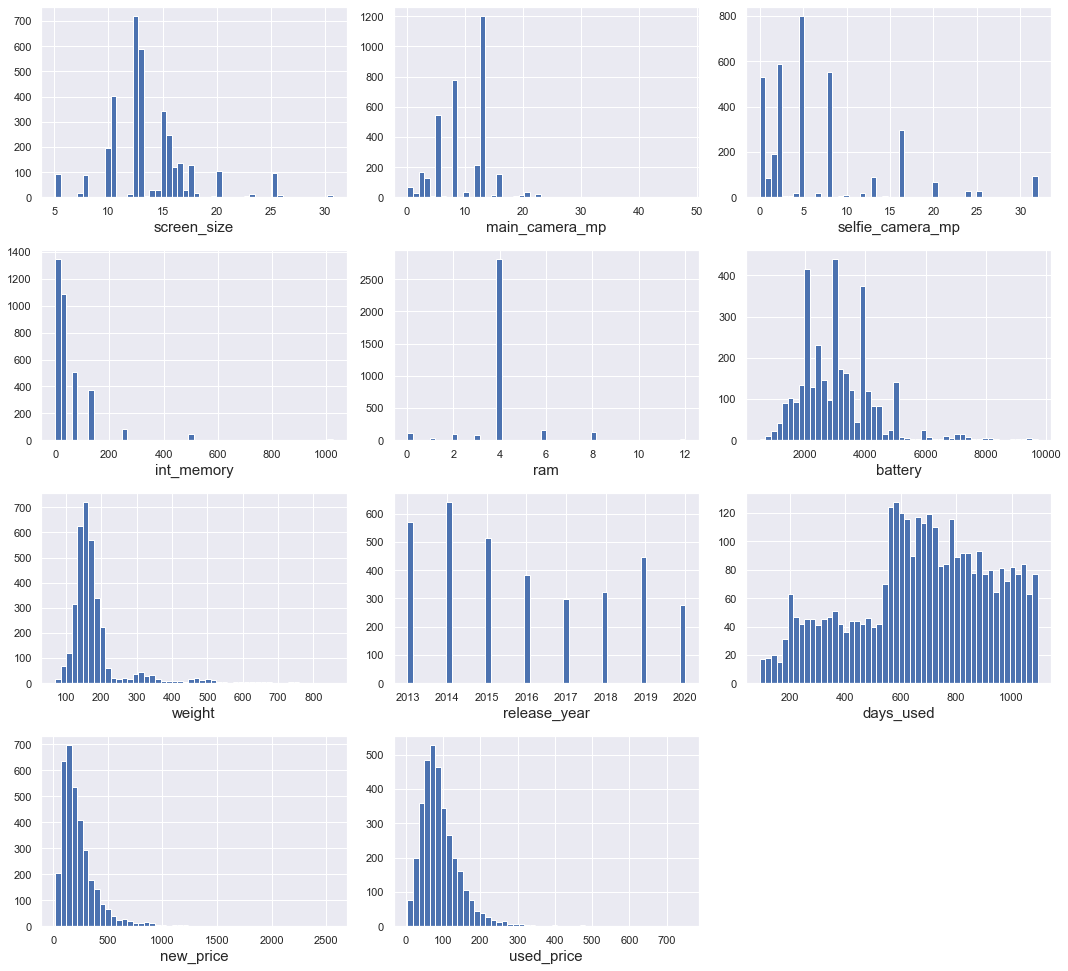

<IPython.core.display.Javascript object>

In [41]:
# creating a list of numerical columns
dist_cols = [item for item in df1.select_dtypes(include=np.number).columns]


# let's plot a histogram of all columns

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df1[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

In [42]:
# dropping the rating column as it is almost normally distributed
dist_cols.remove("screen_size")
dist_cols.remove("main_camera_mp")
dist_cols.remove("selfie_camera_mp")
dist_cols.remove("int_memory")
dist_cols.remove("ram")
dist_cols.remove("battery")
dist_cols.remove("release_year")
dist_cols.remove("days_used")
dist_cols.remove("weight")

df2 = df1.copy()

# applying log transform
for col in dist_cols:
    df2[col + "_log"] = np.log(df2[col] + 1)

# dropping the original columns
df2.drop(dist_cols, axis=1, inplace=True)
df2.head()  # check new dataset

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,device_category,new_price_log,used_price_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,Budget,4.724019,4.320949
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,Mid-ranger,5.523020,5.167810
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,Premium,5.887409,5.117095
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,Mid-ranger,5.634540,5.141254
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,Budget,4.954911,4.402319


<IPython.core.display.Javascript object>

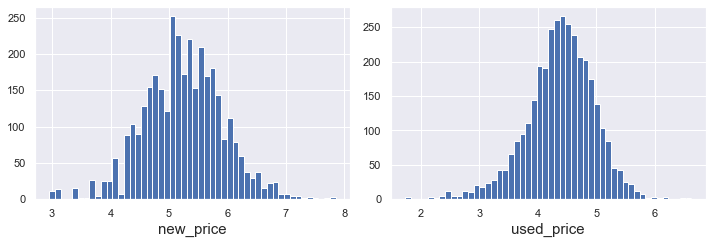

<IPython.core.display.Javascript object>

In [43]:
new_dist_cols = [item + "_log" for item in dist_cols]

plt.figure(figsize=(15, 30))

for i in range(len(dist_cols)):
    plt.subplot(9, 3, i + 1)
    plt.hist(df2[new_dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(dist_cols[i], fontsize=15)

plt.show()

## Outlier Detection

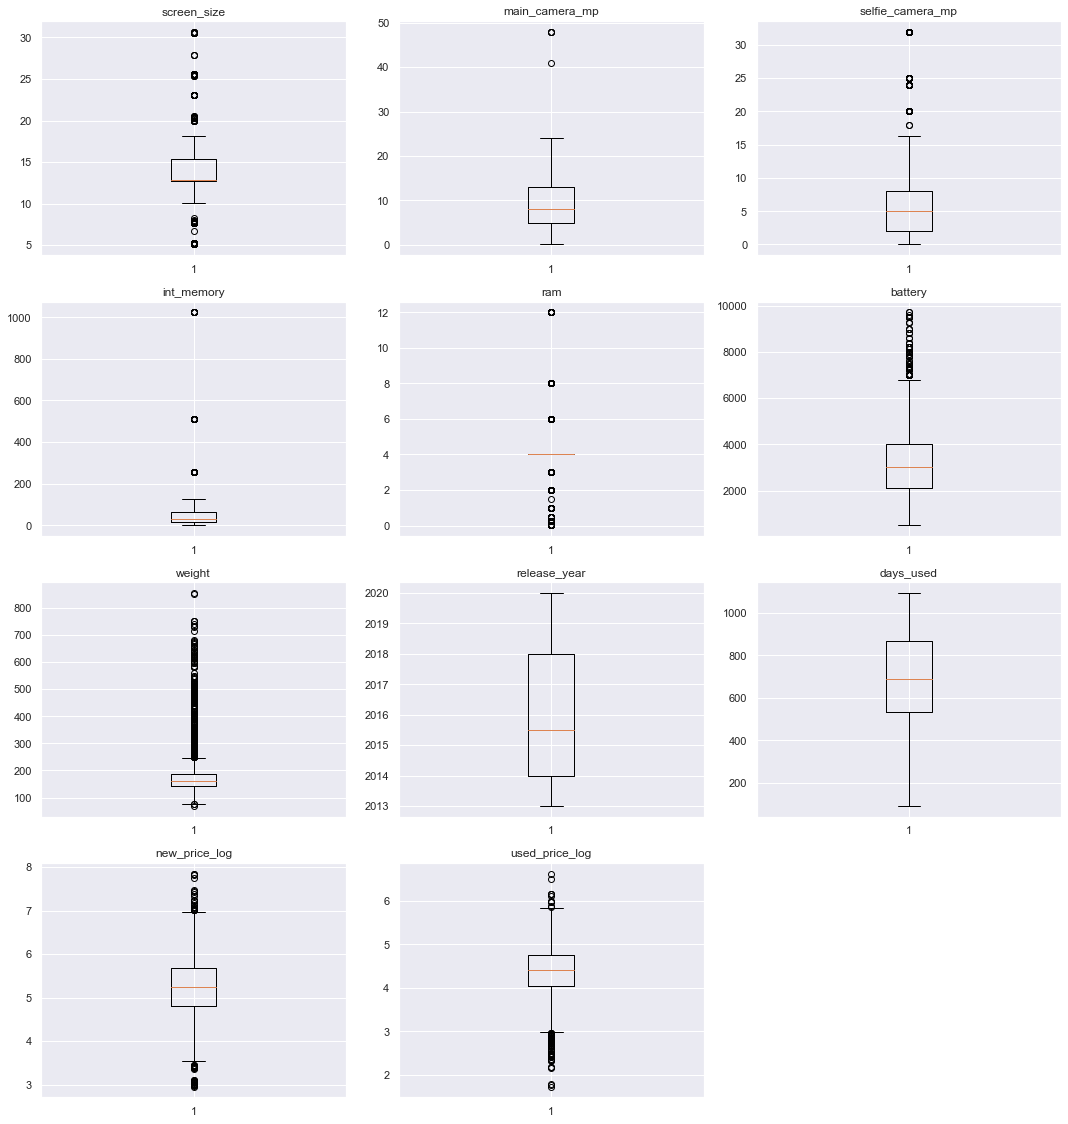

<IPython.core.display.Javascript object>

In [44]:
# creating a list of non-tag columns
out_cols = [item for item in df2.select_dtypes(include=np.number).columns]


plt.figure(figsize=(15, 35))

for i, variable in enumerate(out_cols):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

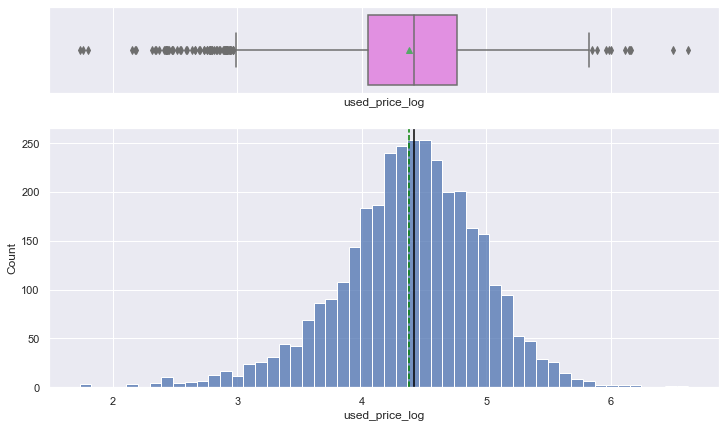

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(df2, "used_price_log")

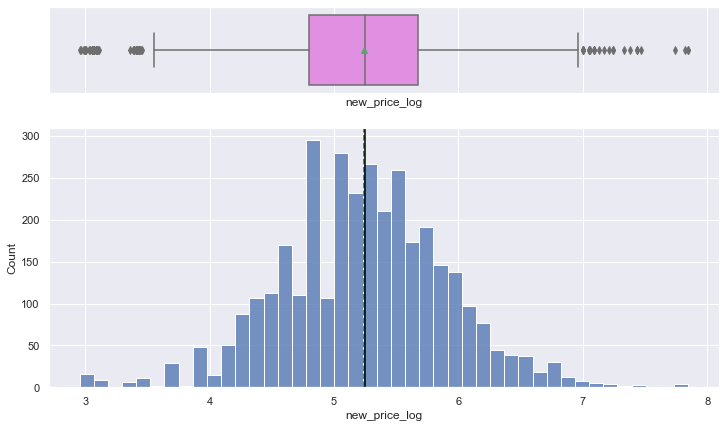

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(df2, "new_price_log")

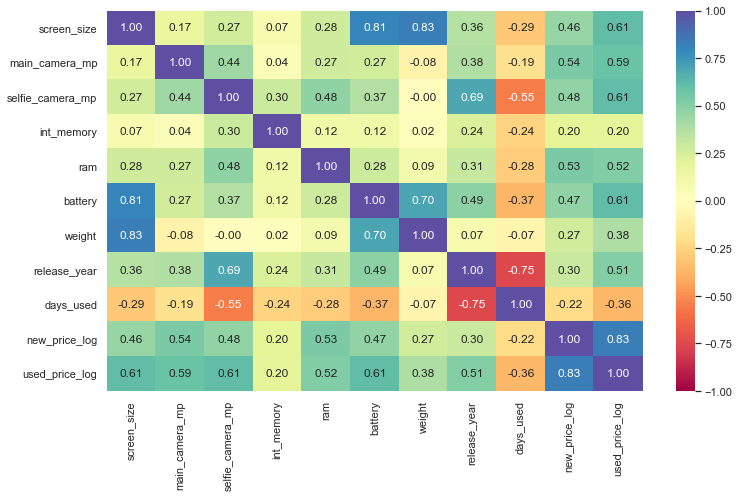

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(12, 7))
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`used_price`) is of *float* type.
- Columns like `brand_name`, `os`, `4g`, `5g` are of *object* type.
- All other columns are numeric in nature.
- There are no duplicate values in the data.
- There are some missing values in the data.


**Data Cleaning:**

- The missing values in the data are treated as follows:
    - Missing values in the data by the column medians grouped by `release_year` and `brand_name`.
    - The remaining missing values in the data by the column medians grouped by `brand_name`.
    - The remaining missing values in the `main_camera_mp` column by the column median.
- The `used_price` and the `new_price` columns are heavily skewed.
- Log transform has been applied to both to reduce the extreme skewness.

**Observations from EDA:**

- Samsung has the most number of devices in the data, followed by Huawei and LG.
- Android phones and tablets dominate more than 90% of the market.
- More than 50% of the devices in the data are budget devices.
- The `used_price` is highly correlated with the `new_price`. 
- `weight`, `screen_size`, and `battery` are closely correlation. 
- The `days_used` is negatively correlated with `main_camera_mp`.
- Most of the companies offer around 4GB of RAM on average. OnePlus offers the highest amount of RAM in general, while Celkon offers the least.
- There is an almost equal number of 4G and non-4G budget devices, but there are no budget devices offering 5G network.
- Most of the mid-rangers and premium devices offer 4G network.
- Very few mid-rangers (~3%) and around 20% of the premium devices offer 5G network.

## Building a Linear Regression model

### Data Preparation for modeling

- We want to predict the used device price, so we will use the normalized version `used_price_log` for modeling.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [48]:
# defining the dependent and independent variables
X = df2.drop(["used_price_log", "device_category"], axis=1)
y = df2["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.724019  
1        325       5.523020  
2        162       5.887409  
3        345       5.634540  
4        293       4.954911  

0    4.

<IPython.core.display.Javascript object>

In [49]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020.0,127.0,4.724019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020.0,325.0,5.523020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020.0,162.0,5.887409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020.0,345.0,5.634540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020.0,293.0,4.954911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<IPython.core.display.Javascript object>

In [50]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [51]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [52]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)
olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     270.4
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:23:52   Log-Likelihood:                 174.12
No. Observations:                2417   AIC:                            -250.2
Df Residuals:                    2368   BIC:                             33.48
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -45.20

<IPython.core.display.Javascript object>

## Model performance evaluation

In [53]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [54]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(
    olsmodel1, x_train1, y_train
)  ## Complete the code to check the performance on train data
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.225152,0.177114,0.84571,0.842516,4.212148


<IPython.core.display.Javascript object>

In [55]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(
    olsmodel1, x_test1, y_test
)  ## Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23299,0.181366,0.843419,0.835646,4.365906


<IPython.core.display.Javascript object>

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [57]:
checking_vif(x_train1)

,feature,VIF
0,const,3.791059e+06
1,screen_size,7.675536e+00
2,main_camera_mp,2.284921e+00
3,selfie_camera_mp,2.812454e+00
4,int_memory,1.364963e+00
5,ram,2.282610e+00
6,battery,4.082002e+00
7,weight,6.397026e+00
8,release_year,4.898186e+00
9,days_used,2.660290e+00


<IPython.core.display.Javascript object>

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [58]:
vifs = checking_vif(x_train1)
highvif = vifs[vifs["VIF"] > 5]  # creates dataset for vifs higher than 5
highvifcols = highvif.feature.tolist()[1:]  # to skip the constant
highvifcols

['screen_size',
 'weight',
 'brand_name_Apple',
 'brand_name_Huawei',
 'brand_name_Others',
 'brand_name_Samsung',
 'os_iOS']

<IPython.core.display.Javascript object>

In [59]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "feature": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [60]:
res = treating_multicollinearity(x_train1, y_train, highvifcols)
res2 = pd.merge(res, vifs, on="feature", how="inner")
res3 = res2.sort_values(
    by="VIF", ascending=False, ignore_index=True
)  # returns the features with high VIF and sort
res3

,feature,Adj. R-squared after_dropping col,RMSE after dropping col,VIF
0,brand_name_Apple,0.842649,0.227422,13.056891
1,os_iOS,0.842637,0.227430,11.784666
2,brand_name_Others,0.842647,0.227423,9.711037
3,screen_size,0.839301,0.229828,7.675536
4,brand_name_Samsung,0.842616,0.227446,7.540022
5,weight,0.838792,0.230192,6.397026
6,brand_name_Huawei,0.842649,0.227422,5.983871


<IPython.core.display.Javascript object>

In [61]:
col_to_drop = res3.feature[0]  # pick feature with highest VIF
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now after column is dropped to know what is left
vifs = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop, "and checking Adj R-sq and RMSE")


highvif = vifs[vifs["VIF"] > 5]
highvifcols = highvif.feature.tolist()[1:]  # to skip the constant

res = treating_multicollinearity(x_train2, y_train, highvifcols)
res2 = pd.merge(res, vifs, on="feature", how="inner")
res4 = res2.sort_values(by="VIF", ascending=False, ignore_index=True)
res4

VIF after dropping  brand_name_Apple and checking Adj R-sq and RMSE


,feature,Adj. R-squared after_dropping col,RMSE after dropping col,VIF
0,brand_name_Others,0.842713,0.227375,9.075460
1,screen_size,0.839356,0.229789,7.641705
2,brand_name_Samsung,0.842681,0.227399,6.991719
3,weight,0.838858,0.230145,6.394281
4,brand_name_Huawei,0.842716,0.227374,5.581686


<IPython.core.display.Javascript object>

In [62]:
col_to_drop = res4.feature[0]  # pick feature with highest VIF
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now after column is dropped to know what is left

print("VIF after dropping ", col_to_drop)

vifs = checking_vif(x_train3)
highvif = vifs[vifs["VIF"] > 5]
highvifcols = highvif.feature.tolist()[1:]  # to skip the constant

res = treating_multicollinearity(x_train3, y_train, highvifcols)
res2 = pd.merge(res, vifs, on="feature", how="inner")
res5 = res2.sort_values(by="VIF", ascending=False, ignore_index=True)
res5

VIF after dropping  brand_name_Others


,feature,Adj. R-squared after_dropping col,RMSE after dropping col,VIF
0,screen_size,0.839372,0.229778,7.568202
1,weight,0.838920,0.230101,6.368369


<IPython.core.display.Javascript object>

In [63]:
col_to_drop = res5.feature[0] # pick feature with highest VIF
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now after column is dropped to know what is left

print("VIF after dropping ", col_to_drop)

vifs = checking_vif(x_train4)
highvif = vifs[vifs["VIF"] > 5]
highvifcols = highvif.feature.tolist()[1:]  # to skip the constant

res = treating_multicollinearity(x_train4, y_train, highvifcols)
res2 = pd.merge(res, vifs, on="feature", how="inner")
res6 = res2.sort_values(by="VIF", ascending=False, ignore_index=True)
res6


VIF after dropping  screen_size


,Adj. R-squared after_dropping col,RMSE after dropping col,feature,VIF


<IPython.core.display.Javascript object>

In [64]:
checking_vif(x_train4)  # no more feature is left with high VIF

,feature,VIF
0,const,3.652542e+06
1,main_camera_mp,2.279745e+00
2,selfie_camera_mp,2.787256e+00
3,int_memory,1.361967e+00
4,ram,2.270287e+00
5,battery,3.832994e+00
6,weight,2.988448e+00
7,release_year,4.715168e+00
8,days_used,2.648081e+00
9,new_price_log,3.051275e+00


<IPython.core.display.Javascript object>

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [65]:
# initial list of columns
cols = (
    x_train4.columns.tolist()
)  ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train4[
        cols
    ]  ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'new_price_log', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


<IPython.core.display.Javascript object>

In [66]:
x_train5 = x_train4[selected_features]
x_test5 = x_test4[selected_features]

<IPython.core.display.Javascript object>

In [67]:
olsmodel2 = sm.OLS(y_train, x_train5).fit()  ##  fit OLS() on y_train and x_train5
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1144.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:23:55   Log-Likelihood:                 126.55
No. Observations:                2417   AIC:                            -229.1
Df Residuals:                    2405   BIC:                            -159.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -54.3449      6

<IPython.core.display.Javascript object>

In [68]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train5, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229627,0.180305,0.839516,0.838715,4.297024


<IPython.core.display.Javascript object>

In [69]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test5, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23638,0.184029,0.83883,0.836942,4.437992


<IPython.core.display.Javascript object>

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.


In [70]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred[
    "Actual Values"
] = y_train.values.flatten()  ## Complete the code to store the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.104130,4.259120,0.061829
1,4.460029,4.945828,0.221982
2,4.328626,4.987638,0.129458
3,4.295788,NaN,NaN
4,4.467975,NaN,NaN


<IPython.core.display.Javascript object>

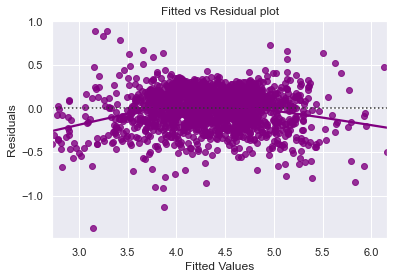

<IPython.core.display.Javascript object>

In [71]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- linearity of residuals is confirmed

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.


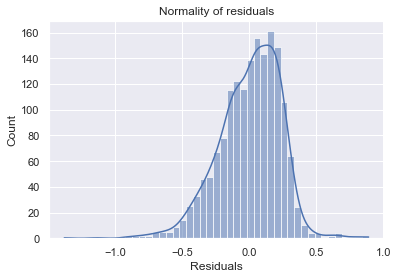

<IPython.core.display.Javascript object>

In [72]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- distribution is normal

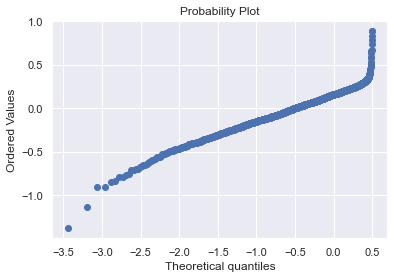

<IPython.core.display.Javascript object>

In [73]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [74]:
print("The p-value is", stats.shapiro(df_pred["Residuals"])[1])

The p-value is 1.0


<IPython.core.display.Javascript object>

- P-value greater than 0.05 confirms normality

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.


In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train5)
lzip(name, test)

[('F statistic', nan), ('p-value', nan)]

<IPython.core.display.Javascript object>

## Final Model Summary

In [76]:
olsmodel_final = sm.OLS(y_train, x_train5).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1144.
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:23:57   Log-Likelihood:                 126.55
No. Observations:                2417   AIC:                            -229.1
Df Residuals:                    2405   BIC:                            -159.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -54.3449      6

<IPython.core.display.Javascript object>

In [77]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train5, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229627,0.180305,0.839516,0.838715,4.297024


<IPython.core.display.Javascript object>

In [78]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test5, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23638,0.184029,0.83883,0.836942,4.437992


<IPython.core.display.Javascript object>

### Model Performance Summary

- We have an R-squared and adjusted R-squared of ~0.84, which shows that we have a good model that is able to explain variance in the price of used phones up to 84%.
- Mean Absolute Error indicates that our current model is able to predict used phone prices within a mean error of 18.4 on the test data.
- MAPE is around 4.4 on the test data, which is less than 5 and indicates a good model

## Actionable Insights and Recommendations

- A unit increase in front camera resolution (`main_camera_mp`) increases the used phone price by 0.0210 units, all other variables held constant.
- A unit increase in selfie camera resolution (`selfie_camera`) increases the used phone price by 0.0142 units, all other variables held constant.
- A unit increase in phone RAM (`ram`) increases the used phone price by 0.0161 units, all other variables held constant.
- A phone having 4G capability (`4g_yes`) increases the used phone price by 0.0472 units, all other variables held constant.

- ReCell should look to attract people who want to sell used phones and tablets which have at least 4G capability and have good front and rear camera resolutions.

- They should also try to gather and put up phones having a high price for new models to try and increase revenue.

